# Selección y Preproceso de los datos I 
 Replace /home/pepe/Trabajo_tfm/datos_csv with your data directory


In [1]:
import pandas as pd
import numpy as np

## Datos de movilidad

Datos recogidos de la pagina web del Ministerio de Transportes Movilidad y Agenda, 2021 reflejan los movimientos de personas entre municipios y distritos por distancia, número de viajes y número de personas que viajaron.

-    Datos de los municipios y distritos del pais. Los distritos incluyen los distritos maritimos
-    Zip codes and postal codes

In [2]:
distritos_municipios = pd.read_csv('~/Trabajo_tfm/datos_csv/relaciones_distrito_mitma.csv') #distritos_municipios.info()
relaciones_municipio_mitma = pd.read_csv('~/Trabajo_tfm/datos_csv/relaciones_municipio_mitma.csv') #relaciones_municipio_mitma.info()

In [3]:
relaciones_municipio_mitma

,municipio,municipio_mitma
0,1001,01001_AM
1,1002,01002
2,1003,01058_AM
3,1004,01010_AM
4,1006,01047_AM
...,...,...
8120,50901,50230_AM
8121,50902,50230_AM
8122,50903,50903_AM
8123,51001,51001


-    Función para filtrar los municipios de cada provincia

In [4]:
def funcion_municipios(desde, hasta):
    provincia = pd.DataFrame(
        relaciones_municipio_mitma.loc[
            (relaciones_municipio_mitma['municipio'] >= desde) & (relaciones_municipio_mitma['municipio'] < hasta)],
        columns=['municipio', 'municipio_mitma'])
    provincia.reset_index(drop=True, inplace=True)
    return provincia

In [5]:
alicante_div    = funcion_municipios (3000,  4000)
almeria_div     = funcion_municipios (4000,  5000)
badajoz_div     = funcion_municipios (6000,  7000)
cadiz_div       = funcion_municipios (11000, 12000)
ciudad_real_div = funcion_municipios (13000, 14000)
cordoba_div     = funcion_municipios (14000, 15000)
coruña_div      = funcion_municipios (15000, 16000)
granada_div     = funcion_municipios (18000, 19000)
huelva_div      = funcion_municipios (21000, 22000)
jaen_div        = funcion_municipios (23000, 24000)
lugo_div        = funcion_municipios (27000, 28000)
madrid_div      = funcion_municipios (28000, 29000)
malaga_div      = funcion_municipios (29000, 30000)
orense_div      = funcion_municipios (32000, 33000)
palencia_div    = funcion_municipios (34000, 35000)
pontevedra_div  = funcion_municipios (36000, 37000)
salamanca_div   = funcion_municipios (37000, 38000)
sevilla_div     = funcion_municipios (41000, 42000)
valencia_div    = funcion_municipios (46000, 47000)
zamora_div      = funcion_municipios (49000, 50000)
zaragoza_div    = funcion_municipios (50000, 60000)


In [6]:
provincias = [[alicante_div, 'ALICANTE'], [almeria_div, 'ALMERIA'],
              [badajoz_div, 'BADAJOZ'], [cadiz_div, 'CADIZ'],
              [ciudad_real_div, 'CIUDAD_REAL'], [cordoba_div, 'CORDOBA'],
              [coruña_div, 'CORUÑA'], [granada_div, 'GRANADA'],
              [huelva_div, 'HUELVA'], [jaen_div, 'JAEN'], [lugo_div, 'LUGO'],
              [madrid_div, 'MADRID'], [malaga_div, 'MALAGA'],
              [orense_div, 'ORENSE'], [palencia_div, 'PALENCIA'],
              [pontevedra_div, 'PONTEVEDRA'], [salamanca_div, 'SALAMANCA'],
              [sevilla_div, 'SEVILLA'], [valencia_div, 'VALENCIA'],
              [zamora_div, 'ZAMORA'], [zaragoza_div, 'ZARAGOZA']]

-  Funcion para cambiar formato en el campo fecha

In [8]:
def funcion_inversion_fecha (row) :
    print(row.fecha)
    AA = row.fecha[:4]
    MM = row.fecha[5:7]
    dd = row.fecha[8:10]
    fecha_d = AA + MM + dd
    return fecha_d

In [7]:
dates = pd.read_csv("~/Trabajo_tfm/datos_csv/jaen_meteo.csv", usecols=['fecha']) # cualquier
#dates.fecha

In [9]:
rango_fechas = np.arange(dates.size)
#rango_fechas

In [10]:
fechas = dates.apply(lambda row: funcion_inversion_fecha(row), axis=1).rename('fechas')

2020-03-01
2020-03-02
2020-03-03
...         ...             ...
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31


-  Funcion para inter-cambiar formato en el campo fecha-  Date format

In [12]:
def funcion_fecha (fecha) :
    fecha_dia = fecha [-8:]
    AA = fecha_dia[:4]
    MM = fecha_dia[4:6]
    dd = fecha_dia[6:8]
    fecha_d = AA +'-' + MM +'-' + dd
    return fecha_d

### Lectura y preproceso de los datos de movilidad por distancia y periodo recorridos y personas

- Los datos se agrupan por el numero de viajes según la distancia del movimiento:
    500-2000 m, 2-5 km, 5-10 km, 10-50 km, 50-100km , +100km
    'v_muy_cortos','v_cortos', 'v_medios','v_largos','v_muy_largos','v_extra_largos'

- Los datos también se agrupan numero de viajes según el periodo del dia 0-24 h, en grupos de 4 
    'v_noche','v_madrugada','v_mañana', 'v_mediodia', 'v_sobremesa', 'v_tarde'

- También estan disponibles por el numero de viajeros wue hicieron esos km, que son los mismos datos pero con el prefijo  _km
    'v_km_extra_largos',......numero de viajeros que hicieron viajes extralargos

Añadiendo un campo para la fecha y otro para la provincia aparecen un total de 26 columnas

Los campos en estos ficheros están separados por ‘|’ (barra vertical) y los valores numéricos contienen ‘.’ (punto) como separador decimal, por lo que es necesario adaptarlos a un formato que pueda ser interpretado por las herramientas a utilizar. 

In [13]:
distancias = []

In [14]:
for fecha in fechas :
    
    dia = pd.read_csv(
        '~/Trabajo_tfm/m1_municipios/'+ fecha + '_maestra_1_mitma_municipio.txt',
        thousands = '.', low_memory=False, memory_map  = True, 
        usecols=['origen', 'periodo', 'distancia', 'viajes','viajes_km'])
    
    dia.rename(columns={"origen": "municipio_mitma"}, inplace=True )
    fecha_d = funcion_fecha(fecha)    #print('Dia :', fecha_d)

    for div_provincia in provincias :
        
        total_viajes_provincia = div_provincia[0].merge(
            dia, how='left', on='municipio_mitma')             

        distancias.append(
            [fecha_d, div_provincia[1], #total_viajes_provincia.viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '0005-002'].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '002-005'].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '005-010'].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '010-050'].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '050-100'].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '100+'].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([0,1,2,3])].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([4,5,6,7])].viajes.sum(),                         
             total_viajes_provincia[total_viajes_provincia.periodo.isin([8,9,10,11])].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([12,13,14,15])].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([16,17,18,19])].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([20,21,22,23])].viajes.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '0005-002'].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '002-005'].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '005-010'].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '010-050'].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '050-100'].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.distancia == '100+'].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([0,1,2,3])].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([4,5,6,7])].viajes_km.sum(),                         
             total_viajes_provincia[total_viajes_provincia.periodo.isin([8,9,10,11])].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([12,13,14,15])].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([16,17,18,19])].viajes_km.sum(),
             total_viajes_provincia[total_viajes_provincia.periodo.isin([20,21,22,23])].viajes_km.sum()
            
            
            
            ])
        

In [15]:
m1_distancias = pd.DataFrame(
    distancias,columns= ['fecha', 'provincia', 'v_muy_cortos','v_cortos',
                         'v_medios','v_largos','v_muy_largos','v_extra_largos',
                         'v_noche','v_madrugada','v_mañana', 'v_mediodia', 'v_sobremesa', 'v_tarde',
                         'v_km_muy_cortos','v_km_cortos', 'v_km_medios','v_km_largos','v_km_muy_largos',
                         'v_km_extra_largos','v_km_noche','v_km_madrugada','v_km_mañana','v_km_mediodia',
                         'v_km_sobremesa','v_km_tarde'])
m1_distancias

,fecha,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_muy_largos,v_extra_largos,v_noche,v_madrugada,...,v_km_medios,v_km_largos,v_km_muy_largos,v_km_extra_largos,v_km_noche,v_km_madrugada,v_km_mañana,v_km_mediodia,v_km_sobremesa,v_km_tarde
0,2020-03-01,ALICANTE,1.425947e+09,1.318852e+09,1.010684e+09,1.037635e+09,120420418.0,71020690.0,465533067.0,359169359.0,...,7.219215e+09,2.204861e+10,8.518258e+09,1.820639e+10,3.185250e+09,4.352442e+09,1.371418e+10,1.717379e+10,1.805652e+10,5.597685e+09
1,2020-03-01,ALMERIA,4.341919e+08,4.761268e+08,4.243445e+08,6.949987e+08,68317578.0,59278893.0,183707347.0,153914145.0,...,3.063400e+09,1.532580e+10,4.621445e+09,1.267408e+10,1.972960e+09,2.532271e+09,7.744530e+09,9.662103e+09,1.236045e+10,3.561935e+09
2,2020-03-01,BADAJOZ,5.781239e+08,3.788876e+08,4.537586e+08,8.536597e+08,112599779.0,115993766.0,233059993.0,172586335.0,...,3.326732e+09,1.746846e+10,7.969185e+09,2.418670e+10,2.427717e+09,3.821297e+09,1.045840e+10,1.493965e+10,1.804473e+10,5.202655e+09
3,2020-03-01,CADIZ,1.146933e+09,8.300140e+08,4.833672e+08,4.572328e+08,122149414.0,96728513.0,320083956.0,222828938.0,...,3.495656e+09,9.003770e+09,9.248296e+09,2.039986e+10,2.120067e+09,2.894714e+09,8.339399e+09,1.281027e+10,1.523117e+10,4.746237e+09
4,2020-03-01,CIUDAD_REAL,4.204837e+08,2.000378e+08,2.208167e+08,4.604185e+08,63507330.0,111473216.0,142928786.0,106146590.0,...,1.640210e+09,9.796447e+09,4.466599e+09,2.080106e+10,1.530861e+09,2.065407e+09,6.476824e+09,1.039649e+10,1.435191e+10,3.030066e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,2021-01-31,SALAMANCA,1.490786e+08,2.781099e+08,6.142380e+08,1.333851e+09,130200940.0,49533339.0,153790648.0,169426947.0,...,4.612938e+09,2.556169e+10,8.443703e+09,1.072449e+10,2.830985e+09,3.453932e+09,9.817553e+09,1.338266e+10,1.685079e+10,4.200667e+09
7073,2021-01-31,SEVILLA,1.651513e+09,8.320263e+08,4.218533e+08,3.455758e+08,20851778.0,13452397.0,267891435.0,230286204.0,...,2.926362e+09,6.113636e+09,1.437184e+09,3.858358e+09,1.051774e+09,1.761211e+09,3.762220e+09,4.984992e+09,4.795233e+09,2.566200e+09
7074,2021-01-31,VALENCIA,1.865030e+09,1.336789e+09,8.701712e+08,6.610261e+08,55876638.0,27669698.0,360573050.0,375979421.0,...,6.174376e+09,1.262380e+10,3.596844e+09,7.587816e+09,1.695310e+09,2.852398e+09,7.865744e+09,9.883690e+09,9.985448e+09,4.170379e+09
7075,2021-01-31,ZAMORA,7.049394e+07,1.850429e+08,5.135634e+08,9.230945e+08,66144220.0,43177929.0,100019814.0,107916547.0,...,3.770070e+09,1.759083e+10,4.543391e+09,8.224505e+09,1.228991e+09,1.732368e+09,5.935764e+09,9.749731e+09,1.198099e+10,4.280942e+09


- Los datos se agrupan por el numero de personas que realizaron viajes, , agrupadas de la siguiente forma :
    'cero_viajes','un_viaje','dos_viajes','mas_de_dos_viajes'

In [16]:
personas = []

In [17]:
for fecha in fechas :
    
    dia = pd.read_csv(
        '~/Trabajo_tfm/m2_municipios/'+ fecha + '_maestra_2_mitma_municipio.txt',
        sep='|', thousands = '.', low_memory=False, memory_map  = True)
    
    dia.rename(columns={"distrito": "municipio_mitma"}, inplace=True )

    fecha_d = funcion_fecha(fecha)   #print('Dia :', fecha_d)

    for div_provincia in provincias :
        
        total_personas_provincia = div_provincia[0].merge(dia, how='left', on='municipio_mitma')             

        personas.append(
            [fecha_d, div_provincia[1],
             total_personas_provincia[total_personas_provincia['numero_viajes'] == '0'].personas.sum(),
             total_personas_provincia[total_personas_provincia['numero_viajes'] == '1'].personas.sum(),
             total_personas_provincia[total_personas_provincia['numero_viajes'] == '2'].personas.sum(),
             total_personas_provincia[total_personas_provincia['numero_viajes'] == '2+'].personas.sum()])
        

In [18]:
m2_personas = pd.DataFrame(personas, columns= ['fecha_m2','provincia_m2',#'personas',
                                               'cero_viajes','un_viaje','dos_viajes','mas_de_dos_viajes'])

In [19]:
m2_personas

,fecha_m2,provincia_m2,cero_viajes,un_viaje,dos_viajes,mas_de_dos_viajes
0,2020-03-01,ALICANTE,8.513143e+08,150474759.0,412014689.0,664243655.0
1,2020-03-01,ALMERIA,4.154558e+08,107652858.0,198521970.0,341563750.0
2,2020-03-01,BADAJOZ,8.125866e+08,135606609.0,288980489.0,403386675.0
3,2020-03-01,CADIZ,4.320126e+08,103931646.0,280562124.0,534378515.0
4,2020-03-01,CIUDAD_REAL,4.807898e+08,92961056.0,183044093.0,216088434.0
...,...,...,...,...,...,...
7072,2021-01-31,SALAMANCA,1.307563e+09,129772842.0,298049179.0,336758651.0
7073,2021-01-31,SEVILLA,1.083667e+09,124945629.0,391185203.0,474827683.0
7074,2021-01-31,VALENCIA,2.105793e+09,180548407.0,590696460.0,648049892.0
7075,2021-01-31,ZAMORA,8.599981e+08,78056926.0,250321348.0,232898905.0


In [20]:
datos_mitma = pd.concat([m1_distancias, m2_personas], axis=1)

In [21]:
#datos_mitma.head(21)

In [22]:
cols_eliminar = ['provincia_m2','fecha_m2']
datos_mitma = datos_mitma.drop(columns = cols_eliminar)

In [23]:
datos_mitma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              7077 non-null   object 
 1   provincia          7077 non-null   object 
 2   v_muy_cortos       7077 non-null   float64
 3   v_cortos           7077 non-null   float64
 4   v_medios           7077 non-null   float64
 5   v_largos           7077 non-null   float64
 6   v_muy_largos       7077 non-null   float64
 7   v_extra_largos     7077 non-null   float64
 8   v_noche            7077 non-null   float64
 9   v_madrugada        7077 non-null   float64
 10  v_mañana           7077 non-null   float64
 11  v_mediodia         7077 non-null   float64
 12  v_sobremesa        7077 non-null   float64
 13  v_tarde            7077 non-null   float64
 14  v_km_muy_cortos    7077 non-null   float64
 15  v_km_cortos        7077 non-null   float64
 16  v_km_medios        7077 

#### Guardar Datos de movilidad 

In [24]:
datos_mitma.to_csv("~/Trabajo_tfm/datos_csv/datos_mitma.csv")

In [25]:
datos_mitma.keys()

Index(['fecha', 'provincia', 'v_muy_cortos', 'v_cortos', 'v_medios',
       'v_largos', 'v_muy_largos', 'v_extra_largos', 'v_noche', 'v_madrugada',
       'v_mañana', 'v_mediodia', 'v_sobremesa', 'v_tarde', 'v_km_muy_cortos',
       'v_km_cortos', 'v_km_medios', 'v_km_largos', 'v_km_muy_largos',
       'v_km_extra_largos', 'v_km_noche', 'v_km_madrugada', 'v_km_mañana',
       'v_km_mediodia', 'v_km_sobremesa', 'v_km_tarde', 'cero_viajes',
       'un_viaje', 'dos_viajes', 'mas_de_dos_viajes'],
      dtype='object')

In [26]:
#datos_mitma.to_csv("~/Trabajo_tfm/datos_csv/datos_movilidad.csv")

## Datos covid

In [27]:
evolucion = pd.read_csv('~/Trabajo_tfm/datos_csv/covid19-provincias-spain_consolidated.csv')

In [28]:
no_necesarias = [
    'ine_code','ccaa', 'new_cases', 'PCR', 'TestAc', 'activos', 'hospitalized', 'hospitalized_accumulated',
    'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated', 'cases_accumulated_PCR', 
    'recovered', 'deceased_hosp_eus', 'num_casos_prueba_pcr', 'num_casos_prueba_test_ac','num_casos_prueba_ag',
    'num_casos_prueba_elisa', 'num_casos_prueba_desconocida', 'num_hosp', 'num_uci', 'num_def', 'num_casos_cum2',
    'num_hosp_cum','num_uci_cum', 'num_def_cum', 'cases_per_cienmil', 'intensive_care_per_1000000',
    'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days', 'cases_7days', 'cases_PCR_14days',
    'cases_PCR_7days', 'daily_cases', 'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7','daily_deaths',
    'daily_deaths_hosp_eus', 'daily_deaths_inc','daily_deaths_avg3', 'daily_deaths_avg7',
    'daily_deaths_avg7_hosp_eus', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7', 'num_casos2_avg7','ia14',
    'source_name', 'source', 'comments']
evolucion.drop(columns = no_necesarias, axis = 1, inplace = True)
evolucion.drop('num_casos', inplace=True, axis=1)
evolucion.drop('num_casos_cum1', inplace=True, axis=1)
evolucion.drop('deaths_last_week', inplace=True, axis=1)

In [29]:
evolucion

,date,province,num_casos2,poblacion
0,2020-01-01,Albacete,0.0,388167
1,2020-01-01,Alicante/Alacant,0.0,1858683
2,2020-01-01,Almería,0.0,716820
3,2020-01-01,Araba/Álava,0.0,331549
4,2020-01-01,Asturias,0.0,1022800
...,...,...,...,...
26838,2021-05-31,Sevilla,NaN,1942389
26839,2021-05-31,Soria,NaN,88636
26840,2021-05-31,Valencia/València,NaN,2565124
26841,2021-05-31,Valladolid,NaN,519546


In [30]:
fechas_ =[]
for fecha in fechas : 
    fechas_.append(funcion_fecha(fecha))

In [31]:
evolucion = evolucion[evolucion.date.isin(fechas_)]

In [32]:
evolucion

,date,province,num_casos2,poblacion
3120,2020-03-01,Albacete,2.0,388167
3121,2020-03-01,Alicante/Alacant,0.0,1858683
3122,2020-03-01,Almería,0.0,716820
3123,2020-03-01,Araba/Álava,1.0,331549
3124,2020-03-01,Asturias,0.0,1022800
...,...,...,...,...
20639,2021-01-31,Toledo,131.0,694844
20640,2021-01-31,Valencia/València,1072.0,2565124
20641,2021-01-31,Valladolid,138.0,519546
20642,2021-01-31,Zamora,24.0,172539


In [33]:
evolucion.province.unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

In [34]:
provinces = ['Alicante/Alacant','Badajoz','Ciudad Real', 'Madrid', 'Palencia','Salamanca',
              'Jaén','Córdoba','Sevilla','Huelva','Cádiz','Málaga','Granada','Almería','Coruña, A','Lugo',
              'Ourense','Pontevedra','Valencia/València','Zamora', 'Zaragoza'] # provincias de estudio

In [35]:
evolucion = evolucion[evolucion.province.isin(provinces)] # filtro por provincias

In [36]:
evolucion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 3121 to 20643
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        7077 non-null   object 
 1   province    7077 non-null   object 
 2   num_casos2  7077 non-null   float64
 3   poblacion   7077 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 276.4+ KB


In [37]:
def nombre_provincia(row): # transfoma la provincia a mayusculas para unificar con otros ficheros
    if row.province == 'Alicante/Alacant':
        return 'alicante'.upper()
    elif row.province == 'Badajoz':
        return 'Badajoz'.upper()
    elif row.province == 'Ciudad Real':
        return 'Ciudad_Real'.upper()
    elif row.province == 'Madrid':
        return 'Madrid'.upper()
    elif row.province == 'Palencia':
        return 'Palencia'.upper()
    elif row.province == 'Salamanca':
        return 'Salamanca'.upper()
    elif row.province == 'Valencia/València':
        return 'Valencia'.upper()  
    elif row.province == 'Zamora':
        return 'Zamora'.upper()  
    elif row.province == 'Zaragoza':
        return 'Zaragoza'.upper()  
    elif row.province == 'Jaén':
        return 'jaen'.upper()
    elif row.province == 'Córdoba':
        return 'cordoba'.upper()
    elif row.province == 'Cádiz':
        return 'Cadiz'.upper()
    elif row.province == 'Sevilla':
        return 'sevilla'.upper()
    elif row.province == 'Granada':
        return 'Granada'.upper()
    elif row.province == 'Huelva':
        return 'huelva'.upper()
    elif row.province == 'Málaga':
        return 'malaga'.upper()
    elif row.province == 'Almería':
        return 'almeria'.upper()
    elif row.province == 'Coruña, A':
        return 'Coruña'.upper()
    elif row.province == 'Lugo':
        return 'lugo'.upper()
    elif row.province == 'Ourense':
        return 'Orense'.upper()
    elif row.province == 'Pontevedra':
        return 'Pontevedra'.upper()

In [38]:
provincia = evolucion.apply(lambda row: nombre_provincia(row), axis=1).rename('provincia')

In [39]:
evolucion = evolucion.drop(columns='province')

In [40]:
evolucion.insert(1,'provincia', provincia)# evolucion.head()

In [41]:
evolucion = evolucion.rename({"date": "fecha"}, axis="columns")

In [42]:
evolucion = evolucion.reset_index()
evolucion.drop('index', inplace=True, axis=1)

In [43]:
evolucion

,fecha,provincia,num_casos2,poblacion
0,2020-03-01,ALICANTE,0.0,1858683
1,2020-03-01,ALMERIA,0.0,716820
2,2020-03-01,BADAJOZ,2.0,673559
3,2020-03-01,CADIZ,0.0,1240155
4,2020-03-01,CIUDAD_REAL,0.0,495761
...,...,...,...,...
7072,2021-01-31,SALAMANCA,105.0,330119
7073,2021-01-31,SEVILLA,395.0,1942389
7074,2021-01-31,VALENCIA,1072.0,2565124
7075,2021-01-31,ZAMORA,24.0,172539


In [44]:
evolucion = evolucion.rename({"num_casos2": "num_casos"}, axis="columns")

#### Guardar Datos de virus 

In [45]:
evolucion.to_csv("~/Trabajo_tfm/datos_csv/datos_covid.csv")

In [46]:
tarjeta = pd.merge(datos_mitma, evolucion)
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              7077 non-null   object 
 1   provincia          7077 non-null   object 
 2   v_muy_cortos       7077 non-null   float64
 3   v_cortos           7077 non-null   float64
 4   v_medios           7077 non-null   float64
 5   v_largos           7077 non-null   float64
 6   v_muy_largos       7077 non-null   float64
 7   v_extra_largos     7077 non-null   float64
 8   v_noche            7077 non-null   float64
 9   v_madrugada        7077 non-null   float64
 10  v_mañana           7077 non-null   float64
 11  v_mediodia         7077 non-null   float64
 12  v_sobremesa        7077 non-null   float64
 13  v_tarde            7077 non-null   float64
 14  v_km_muy_cortos    7077 non-null   float64
 15  v_km_cortos        7077 non-null   float64
 16  v_km_medios        7077 

## Datos meteorológicos

Los datos proceden del AEMET y han sido obtenidos a traves de una clave que suministra la web.

In [47]:
import json

In [48]:
unnamed = ["Unnamed: 0"]

In [49]:
with open("/home/pepe/Trabajo_tfm/datos_csv/jaen_meteo.json") as file:
     jaen_meteo = json.load(file) 

df_jaen_meteo = pd.DataFrame(jaen_meteo)
df_jaen_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_jaen_meteo.csv")
df_jaen_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_jaen_meteo.csv", decimal=',') 
df_jaen_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [50]:
with open("/home/pepe/Trabajo_tfm/datos_csv/cordoba_meteo.json") as file:
    cordoba_meteo = json.load(file)

df_cordoba_meteo = pd.DataFrame(cordoba_meteo)
df_cordoba_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_cordoba_meteo.csv")
df_cordoba_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_cordoba_meteo.csv", decimal=',') # cualquiera
df_cordoba_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [51]:
with open("/home/pepe/Trabajo_tfm/datos_csv/sevilla_meteo.json") as file:
    sevilla_meteo = json.load(file)

df_sevilla_meteo = pd.DataFrame(sevilla_meteo)
df_sevilla_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_sevilla_meteo.csv")
df_sevilla_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_sevilla_meteo.csv", decimal=',') # cualquiera
df_sevilla_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [52]:
with open("/home/pepe/Trabajo_tfm/datos_csv/huelva_meteo.json") as file:
    huelva_meteo = json.load(file)

df_huelva_meteo = pd.DataFrame(huelva_meteo)
df_huelva_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_huelva_meteo.csv")
df_huelva_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_huelva_meteo.csv", decimal=',') # cualquiera
df_huelva_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [53]:
with open("/home/pepe/Trabajo_tfm/datos_csv/malaga_meteo_aeropuerto.json") as file:
    malaga_meteo = json.load(file)

df_malaga_meteo = pd.DataFrame(malaga_meteo)
df_malaga_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_malaga_meteo.csv")
df_malaga_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_malaga_meteo.csv", decimal=',') # cualquiera
df_malaga_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [54]:
with open("/home/pepe/Trabajo_tfm/datos_csv/granada_meteo.json") as file:
    granada_meteo = json.load(file)

df_granada_meteo = pd.DataFrame(granada_meteo)
df_granada_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_granada_meteo.csv")
df_granada_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_granada_meteo.csv", decimal=',') # cualquiera
df_granada_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [55]:
with open("/home/pepe/Trabajo_tfm/datos_csv/almeria_meteo.json") as file:
    almeria_meteo = json.load(file)

df_almeria_meteo = pd.DataFrame(almeria_meteo)
df_almeria_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_almeria_meteo.csv")
df_almeria_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_almeria_meteo.csv", decimal=',') # cualquiera
df_almeria_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [56]:
with open("/home/pepe/Trabajo_tfm/datos_csv/coruna_meteo.json") as file:
    coruna_meteo = json.load(file)

df_coruna_meteo = pd.DataFrame(coruna_meteo)
df_coruna_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_coruna_meteo.csv")
df_coruna_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_coruna_meteo.csv", decimal=',') # cualquiera
df_coruna_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [57]:
with open("/home/pepe/Trabajo_tfm/datos_csv/lugo_meteo.json") as file:
    lugo_meteo = json.load(file)

df_lugo_meteo = pd.DataFrame(lugo_meteo)
df_lugo_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_lugo_meteo.csv")
df_lugo_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_lugo_meteo.csv", decimal=',') # cualquiera
df_lugo_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [58]:
with open("/home/pepe/Trabajo_tfm/datos_csv/orense_meteo.json") as file:
    orense_meteo = json.load(file)

df_orense_meteo = pd.DataFrame(orense_meteo)
df_orense_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_orense_meteo.csv")
df_orense_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_orense_meteo.csv", decimal=',') # cualquiera
df_orense_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [59]:
with open("/home/pepe/Trabajo_tfm/datos_csv/pontevedra_meteo.json") as file:
    pontevedra_meteo = json.load(file)

df_pontevedra_meteo = pd.DataFrame(pontevedra_meteo)
df_pontevedra_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_pontevedra_meteo.csv")
df_pontevedra_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_pontevedra_meteo.csv", decimal=',') # cualquiera
df_pontevedra_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [60]:
with open("/home/pepe/Trabajo_tfm/datos_csv/zaragoza_meteo.json") as file:
    zaragoza_meteo = json.load(file)

df_zaragoza_meteo = pd.DataFrame(zaragoza_meteo)
df_zaragoza_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_zaragoza_meteo.csv")
df_zaragoza_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_zaragoza_meteo.csv", decimal=',') # cualquiera
df_zaragoza_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [61]:
with open("/home/pepe/Trabajo_tfm/datos_csv/zamora_meteo.json") as file:
    zamora_meteo = json.load(file)

df_zamora_meteo = pd.DataFrame(zamora_meteo)
df_zamora_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_zamora_meteo.csv")
df_zamora_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_zamora_meteo.csv", decimal=',') # cualquiera
df_zamora_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [62]:
with open("/home/pepe/Trabajo_tfm/datos_csv/palencia_meteo.json") as file:
    palencia_meteo = json.load(file)

df_palencia_meteo = pd.DataFrame(palencia_meteo)
df_palencia_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_palencia_meteo.csv")
df_palencia_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_palencia_meteo.csv", 
                                decimal=',') # cualquiera
df_palencia_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [63]:
with open("/home/pepe/Trabajo_tfm/datos_csv/salamanca_meteo.json") as file:
    salamanca_meteo = json.load(file)

df_salamanca_meteo = pd.DataFrame(salamanca_meteo)
df_salamanca_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_salamanca_meteo.csv")
df_salamanca_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_salamanca_meteo.csv", decimal=',') # cualquiera
df_salamanca_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [64]:
with open("/home/pepe/Trabajo_tfm/datos_csv/madrid_meteo.json") as file:
    madrid_meteo = json.load(file)

df_madrid_meteo = pd.DataFrame(madrid_meteo)
df_madrid_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_madrid_meteo.csv")
df_madrid_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_madrid_meteo.csv", decimal=',') # cualquiera
df_madrid_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [65]:
with open("/home/pepe/Trabajo_tfm/datos_csv/ciudad_real_meteo.json") as file:
    ciudadreal_meteo = json.load(file)

df_ciudadreal_meteo = pd.DataFrame(ciudadreal_meteo)
df_ciudadreal_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_ciudadreal_meteo.csv")
df_ciudadreal_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_ciudadreal_meteo.csv", decimal=',') # cualquiera
df_ciudadreal_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [66]:
with open("/home/pepe/Trabajo_tfm/datos_csv/badajoz_meteo.json") as file:
    badajoz_meteo = json.load(file)

df_badajoz_meteo = pd.DataFrame(badajoz_meteo)
df_badajoz_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_badajoz_meteo.csv")
df_badajoz_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_badajoz_meteo.csv", decimal=',') # cualquiera
df_badajoz_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [67]:
with open("/home/pepe/Trabajo_tfm/datos_csv/valencia_meteo.json") as file:
    valencia_meteo = json.load(file)

df_valencia_meteo = pd.DataFrame(valencia_meteo)
df_valencia_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_valencia_meteo.csv")
df_valencia_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_valencia_meteo.csv", decimal=',') # cualquiera
df_valencia_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [68]:
with open("/home/pepe/Trabajo_tfm/datos_csv/alicante_meteo.json") as file:
    alicante_meteo = json.load(file)

df_alicante_meteo = pd.DataFrame(alicante_meteo)
df_alicante_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_alicante_meteo.csv")
df_alicante_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_alicante_meteo.csv", decimal=',') # cualquiera
df_alicante_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [69]:
with open("/home/pepe/Trabajo_tfm/datos_csv/cadiz_meteo.json") as file:
    cadiz_meteo = json.load(file)

df_cadiz_meteo = pd.DataFrame(cadiz_meteo)
df_cadiz_meteo.to_csv("~/Trabajo_tfm/datos_csv/df_cadiz_meteo.csv")
df_cadiz_meteo = pd.read_csv("~/Trabajo_tfm/datos_csv/df_cadiz_meteo.csv", decimal=',') # cualquiera
df_cadiz_meteo.drop(columns = unnamed, inplace= True, axis=1)

In [70]:
no_utiles = ['nombre','horatmin', 'indicativo', 'horatmax', 'dir', 'racha','horaracha',
             'horaPresMax','horaPresMin']

df_alicante_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_badajoz_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_ciudadreal_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_madrid_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_palencia_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_salamanca_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_valencia_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_zamora_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_zaragoza_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_jaen_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_cordoba_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_sevilla_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_huelva_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_cadiz_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_malaga_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_granada_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_almeria_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_coruna_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_lugo_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_orense_meteo.drop(columns = no_utiles, inplace= True, axis=1)
df_pontevedra_meteo.drop(columns = no_utiles, inplace= True, axis=1)

### Humedad relativa 

Los datos de este parametro , ficheros *_hr.csv han sido obtenidos de a mano a partir de las graficas de meteoblue

In [71]:
alicante_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/alicante_hr.csv")
clima_alicante = pd.concat([df_alicante_meteo, alicante_hr], axis = 1)

badajoz_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/badajoz_hr.csv")
clima_badajoz = pd.concat([df_badajoz_meteo, badajoz_hr], axis = 1)

ciudad_real_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/ciudad_real_hr.csv")
clima_ciudad_real = pd.concat([df_ciudadreal_meteo, ciudad_real_hr], axis = 1)

madrid_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/madrid_hr.csv")
clima_madrid = pd.concat([df_madrid_meteo, madrid_hr], axis = 1)

palencia_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/palencia_hr.csv")
clima_palencia = pd.concat([df_palencia_meteo, palencia_hr], axis = 1)

salamanca_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/salamanca_hr.csv")
clima_salamanca = pd.concat([df_salamanca_meteo, salamanca_hr], axis = 1)

valencia_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/valencia_hr.csv")
clima_valencia = pd.concat([df_valencia_meteo, valencia_hr], axis = 1)

zamora_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/zamora_hr.csv")
clima_zamora = pd.concat([df_zamora_meteo, zamora_hr], axis = 1)

zaragoza_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/zaragoza_hr.csv")
clima_zaragoza = pd.concat([df_zaragoza_meteo, zaragoza_hr], axis = 1)

jaen_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/jaen_hr.csv")
clima_jaen = pd.concat([df_jaen_meteo, jaen_hr], axis = 1)

cordoba_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/cordoba_hr.csv")
clima_cordoba = pd.concat([df_cordoba_meteo, cordoba_hr], axis = 1)

sevilla_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/sevilla_hr.csv")
clima_sevilla = pd.concat([df_sevilla_meteo, sevilla_hr], axis = 1)

huelva_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/huelva_hr.csv")
clima_huelva = pd.concat([df_huelva_meteo, huelva_hr], axis = 1)

cadiz_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/cadiz_hr.csv")
clima_cadiz = pd.concat([df_cadiz_meteo, cadiz_hr], axis = 1)

malaga_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/malaga_hr.csv")
clima_malaga = pd.concat([df_malaga_meteo, malaga_hr], axis = 1)

granada_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/granada_hr.csv")
clima_granada = pd.concat([df_granada_meteo, granada_hr], axis = 1)

almeria_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/almeria_hr.csv")
clima_almeria = pd.concat([df_almeria_meteo, almeria_hr], axis = 1)

coruna_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/coruna_hr.csv")
clima_coruna = pd.concat([df_coruna_meteo, coruna_hr], axis = 1)

lugo_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/lugo_hr.csv")
clima_lugo = pd.concat([df_lugo_meteo, lugo_hr], axis = 1)

orense_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/orense_hr.csv")
clima_orense = pd.concat([df_orense_meteo, orense_hr], axis = 1)

pontevedra_hr = pd.read_csv("~/Trabajo_tfm/datos_humedad_r/pontevedra_hr.csv")
clima_pontevedra = pd.concat([df_pontevedra_meteo, pontevedra_hr], axis = 1)

In [72]:
climas = pd.concat([clima_alicante, clima_almeria, clima_badajoz, clima_cadiz,
                    clima_ciudad_real, clima_cordoba, clima_coruna,clima_granada,
                    clima_huelva, clima_jaen, clima_lugo, clima_madrid,clima_malaga, 
                    clima_orense, clima_palencia, clima_pontevedra, clima_salamanca,
                    clima_sevilla, clima_valencia, clima_zamora, clima_zaragoza])

In [73]:
climas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 336
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   altitud    7077 non-null   int64  
 3   tmed       7065 non-null   float64
 4   prec       7009 non-null   object 
 5   tmin       7065 non-null   float64
 6   tmax       7065 non-null   float64
 7   velmedia   6860 non-null   float64
 8   sol        5884 non-null   float64
 9   presMax    7027 non-null   float64
 10  presMin    7027 non-null   float64
 11  hr         7077 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 718.8+ KB


<AxesSubplot:>

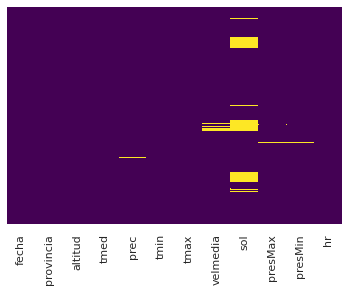

In [74]:
# uso de mapa de calor para visualizar los nulos
import seaborn as sns
sns.set( )  #sns.set(style="white") # #sns.set(style="darkgrid") style='ticks'
sns.heatmap(climas.isna(), yticklabels=False, cbar=False, cmap='viridis')

- Unificación de los nombres de las provincias

In [75]:
climas.provincia.unique()

array(['ALICANTE', 'ALMERIA', 'BADAJOZ', 'CADIZ', 'CIUDAD REAL',
       'CORDOBA', 'A CORUÑA', 'GRANADA', 'HUELVA', 'JAEN', 'LUGO',
       'MADRID', 'MALAGA', 'OURENSE', 'PALENCIA', 'PONTEVEDRA',
       'SALAMANCA', 'SEVILLA', 'VALENCIA', 'ZAMORA', 'ZARAGOZA'],
      dtype=object)

In [76]:
def nombre_provincia(row):
    # transfoma la provincia a mayusculas para unificar
    if row.provincia == 'ALICANTE':
        return 'alicante'.upper()
    elif row.provincia == 'BADAJOZ':
        return 'Badajoz'.upper()
    elif row.provincia == 'CIUDAD REAL':
        return 'Ciudad_Real'.upper()
    elif row.provincia == 'MADRID':
        return 'Madrid'.upper()
    elif row.provincia == 'PALENCIA':
        return 'Palencia'.upper()
    elif row.provincia == 'SALAMANCA':
        return 'Salamanca'.upper()
    elif row.provincia == 'VALENCIA':
        return 'Valencia'.upper()  
    elif row.provincia == 'ZAMORA':
        return 'Zamora'.upper()  
    elif row.provincia == 'ZARAGOZA':
        return 'Zaragoza'.upper()  
    elif row.provincia == 'JAEN':
        return 'jaen'.upper()
    elif row.provincia == 'CORDOBA':
        return 'cordoba'.upper()
    elif row.provincia == 'CADIZ':
        return 'Cadiz'.upper()
    elif row.provincia == 'SEVILLA':
        return 'sevilla'.upper()
    elif row.provincia == 'GRANADA':
        return 'Granada'.upper()
    elif row.provincia == 'HUELVA':
        return 'huelva'.upper()
    elif row.provincia == 'MALAGA':
        return 'malaga'.upper()
    elif row.provincia == 'ALMERIA':
        return 'almeria'.upper()
    elif row.provincia == 'A CORUÑA':
        return 'Coruña'.upper()
    elif row.provincia == 'LUGO':
        return 'lugo'.upper()
    elif row.provincia == 'OURENSE':
        return 'Orense'.upper()
    elif row.provincia == 'PONTEVEDRA':
        return 'Pontevedra'.upper()

In [77]:
provincia = climas.apply(lambda row: nombre_provincia(row), axis=1).rename('provincia')

In [78]:
climas = climas.drop(columns='provincia')
climas.insert(1,'provincia', provincia)# evolucion.head()

In [79]:
clima = pd.concat([ # construccion
    climas[climas.provincia =='ALICANTE'],
    climas[climas.provincia =='BADAJOZ'],
    climas[climas.provincia =='CIUDAD_REAL'],
    climas[climas.provincia =='MADRID'],
    climas[climas.provincia =='PALENCIA'],
    climas[climas.provincia =='SALAMANCA'],
    climas[climas.provincia =='VALENCIA'],
    climas[climas.provincia =='ZAMORA'],
    climas[climas.provincia =='ZARAGOZA'],
    climas[climas.provincia =='JAEN'], # ordenacion por provincias
    climas[climas.provincia =='CORDOBA'],
    climas[climas.provincia =='SEVILLA'],
    climas[climas.provincia =='HUELVA'],
    climas[climas.provincia =='CADIZ'],
    climas[climas.provincia =='MALAGA'],
    climas[climas.provincia =='GRANADA'],
    climas[climas.provincia =='ALMERIA'],
    climas[climas.provincia =='CORUÑA'],
    climas[climas.provincia =='LUGO'],
    climas[climas.provincia =='ORENSE'],
    climas[climas.provincia =='PONTEVEDRA']])

In [80]:
clima = clima.reset_index()
indice = ['index']
clima.drop(columns = indice, inplace= True, axis=1)

In [81]:
climas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 336
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   altitud    7077 non-null   int64  
 3   tmed       7065 non-null   float64
 4   prec       7009 non-null   object 
 5   tmin       7065 non-null   float64
 6   tmax       7065 non-null   float64
 7   velmedia   6860 non-null   float64
 8   sol        5884 non-null   float64
 9   presMax    7027 non-null   float64
 10  presMin    7027 non-null   float64
 11  hr         7077 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 718.8+ KB


### Procesamiento de valores vacios y formato incorrecto en las variables meteorológicas


In [82]:
atributos_con_na = [atributos for atributos in clima.columns if clima[atributos].isnull().sum()>1]
for atributo in atributos_con_na:
    print(atributo, np.round(clima[atributo].isnull().mean(),4),'% valores perdidos')

tmed 0.0017 % valores perdidos
prec 0.0096 % valores perdidos
tmin 0.0017 % valores perdidos
tmax 0.0017 % valores perdidos
velmedia 0.0307 % valores perdidos
sol 0.1686 % valores perdidos
presMax 0.0071 % valores perdidos
presMin 0.0071 % valores perdidos


In [83]:
clima = clima.replace({'Ip': '0,0'})
clima = clima.replace({'nan': '0,0'})

In [84]:
# Iterate through the columns
for col in list(clima.columns):
    # Select columns that should be numeric
    if ('prec' in col ):
        clima[col] = clima[col].astype(str)

In [85]:
def formato_prec(row):
    if row.prec== 'nan':
        precN =0.0
    else :
        litros = float(row.prec[:-2])
        decima = float(row.prec[-1:])
        precN = (litros) + (decima)/10.0
    #print(precN)
    return precN 

In [86]:
prec = clima.apply(lambda row: formato_prec(row), axis=1).rename('prec')

In [87]:
col_eliminar_met = ['prec']
clima.drop(columns = col_eliminar_met, axis = 1, inplace = True) 

clima.insert(4,'prec',prec)

In [88]:
datos_clima = clima.sort_values(by=['fecha', 'provincia'])

In [89]:
datos_clima = datos_clima.reset_index()
datos_clima.drop('index', inplace=True, axis=1)

In [90]:
datos_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   altitud    7077 non-null   int64  
 3   tmed       7065 non-null   float64
 4   prec       7077 non-null   float64
 5   tmin       7065 non-null   float64
 6   tmax       7065 non-null   float64
 7   velmedia   6860 non-null   float64
 8   sol        5884 non-null   float64
 9   presMax    7027 non-null   float64
 10  presMin    7027 non-null   float64
 11  hr         7077 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 663.6+ KB


#### Guardar Datos de clima 

In [91]:
datos_clima.to_csv("~/Trabajo_tfm/datos_csv/datos_clima.csv")

In [92]:
tarjeta = pd.merge(tarjeta, datos_clima)
tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              7077 non-null   object 
 1   provincia          7077 non-null   object 
 2   v_muy_cortos       7077 non-null   float64
 3   v_cortos           7077 non-null   float64
 4   v_medios           7077 non-null   float64
 5   v_largos           7077 non-null   float64
 6   v_muy_largos       7077 non-null   float64
 7   v_extra_largos     7077 non-null   float64
 8   v_noche            7077 non-null   float64
 9   v_madrugada        7077 non-null   float64
 10  v_mañana           7077 non-null   float64
 11  v_mediodia         7077 non-null   float64
 12  v_sobremesa        7077 non-null   float64
 13  v_tarde            7077 non-null   float64
 14  v_km_muy_cortos    7077 non-null   float64
 15  v_km_cortos        7077 non-null   float64
 16  v_km_medios        7077 

# Guardar Tarjeta de datos

In [93]:
tarjeta.to_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos.csv")